In [7]:
import tweepy
import re
import pickle
from tweepy import OAuthHandler
import pandas as pd
import matplotlib.pyplot as plt
import string

pd.set_option('display.max_colwidth', 1)
pd.set_option('display.max_columns', 500)

In [2]:
consumer_key = 'zRLze0lH2AKxY1bkVqpXfuhDZ'
consumer_secret = 'hAbqGAiTjwvTVBdUX0MMdl7Eqcb5eQPPY5jwx4SkGj07I4hGaD'
access_token = '1397618616653209602-3LUD2QVsxS5xjznEcTQJ6545G2lUko'
access_secret = 'DALjzoSMrU71FoULD4VOYN46yCtl9c1xsKghGtQGPvNxa'

In [3]:
# Loading the vectorizer and classfier
with open('OneVsRestClassifier.pickle','rb') as f:
    svm_model = pickle.load(f)
    
with open('model_tfidf.pickle','rb') as f:
    tfidf = pickle.load(f)    

In [4]:
import csv
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
args = ['εμβολιο'];
api = tweepy.API(auth,timeout=10)


# Fetching the tweets
list_tweets = []

query = args[0]
if len(args) == 1:
    for status in tweepy.Cursor(api.search, q=query+" -filter:retweets",lang='el',result_type='recent', tweet_mode = 'extended').items(500):
        list_tweets.append(status.full_text)
        
for tweet in list_tweets:
    tweet = tweet.lower()
    tweet = re.sub('https\S+', '', tweet)
    tweet = re.sub(r'@[a-zA-Z0-9]', '', tweet)
    tweet = re.sub(r'[a-zA-Z0-9]', '', tweet)
    tweet = re.sub(r"ά","α",tweet)
    tweet = re.sub(r"έ","ε",tweet)
    tweet = re.sub(r"ή","η",tweet)
    tweet = re.sub(r"ί","ι",tweet)
    tweet = re.sub(r"ύ","υ",tweet)
    tweet = re.sub(r"ώ","ω",tweet)
    tweet = re.sub(r"ϊ","ι",tweet)  
    tweet = re.sub(r"ό","ο",tweet)
    tweet = re.sub(r"ό","ο",tweet)
    tweet = re.sub(r"#","",tweet)
    tweet = re.sub(r"!","",tweet)
    tweet = re.sub(r"«","",tweet)
    tweet = re.sub(r"»","",tweet)
    tweet = re.sub(r";","",tweet)
    tweet = re.sub(r"ϋ","",tweet)
    tweet = re.sub(r"/","",tweet)    
    tweet = re.sub(r',', ' ', tweet)
    sent = svm_model.predict(tfidf.transform([tweet]).toarray())
    print(tweet,":",sent)    
    
    # Filter based on listed items
    csvw = csv.writer(open("data/predicted", "a"))
    csvw.writerow([status.user.screen_name,
                   # created_at is a datetime object, converting to just grab the month/day/year
                   status.created_at.strftime('%m/%d/%y'),
                   sent,
                   tweet])

δυστυχως το % εμβολιασμενο ισραηλ επεστρεψε στην προ-εμβολιου εποχη.
ειχε δικιο ο τσιπρας που τον περασμενο δεκεμβρη ειπε οτι μονο με το εμβολιο δεν προκειται να σταματησουμε την πανδημια.
δικαιωθηκε... για αλλη μια φορα. 👇
  : ['negative']
μαγιορκινης: δεν αποκλειω τριτη δοση σε ολους- το ανανεωμενο εμβολιο της   : ['positive']
 _ μα δεν εχει να κανει με την αντιληπτικη ικανοτητα του δεκτη  εχει να κανει με το οτι ο συλλογισμος του (και ο δικος σας εδω τουλαχιστον) ειναι λαθος και οδηγει στο συμπερασμα "δεν κανω εμβολιο γιατι προκαλει μεταλλαξεις". δεν λεει αυτα η θεωρια της εξελιξης ομως. : ['positive']
η μεταλλαξη των ψεκασμενων  απο εκει που φοβοντουσαν οτι το εμβολιο μπορει να σκοτωσει εναν στο εκατομμυριο  τωρα ειναι και απολυτα σιγουροι οτι θα πεθανουμε στο μελλον ολοι οσοι το εχουμε κανει  σχεδον το ευχονται  : ['negative']
αυξανεται ο αριθμος των νεκρων απο εμβολιο στην ελλαδα – χρονος απεβιωσε μετα την η δοση εμβολιου   : ['negative']
ειναι κεντρικα σημεια κοντρας τοσο απο τα

μπουρλα: βουλη  πιθανη η εμφανιση ανθεκτικης μεταλλαξης – σε  μερες νεο εμβολιο την πιθανοτητα να εμφανιστει στο μελλον μια παραλλαγη του κορωνοιου που να ειναι ανθεκτικη απεναντι στα εμβολια ανεδειξε ο  της  αλμπερτ μπουρλα.
 : ['positive']
ξεσκεπαζονται οι εμβολιολαγνοι ανθρωπιστες. εμ αν εισαι γκασμας μονο ετσι θα βρεις δουλεια εμβολιασμοι εμβολιο εμβολιασμενοι ανεμβολιαστοι μετρα κικιλιας  : ['negative']
εμβολιο  & : εν αναμονη της δευτερης δοσης – προσφερει πλασια αντισωματα  : ['negative']
εχεις κανει εμβολιο εμβολιασμοι εμβολιο : ['neutral']
σαλος στο βελγιο. σακατεψε  νεα παιδια αθλητες (- ετων) ποδηλατες το εμβολιο της και οι  στο νοσοκομειο με καρδιακα προβληματα μετα τον εμβολιασμος εμβολιο κρουσματα εμβολιασμοι   
 : ['positive']
ενα εμβολιο την ημερα  τον γιατρο τον κανει περα. : ['neutral']
 : ειμαι ζωντανη μετα το εμβολιο 😂 : ['negative']
 τι φοβαται οτι θα του κανει το εμβολιο που δεν το εχει παθει ηδη : ['negative']
 ρε δε μας παρατας και εσυ ρε βλακα με το εμβολιο μας

__ συγγνωμη κιολας αλλα δεν φταινε οι ανεμβολιαστοι αν καποιοι ανθρωποι δεν μπορουν να κανουν το εμβολιο. μπραβο που το εκανες χωρις φοβο και αμφιβολια αλλα δεν καταλαβαινω γιατι σε ενοχλουν τοσο αυτοι που εχουν αλλη αποψη... : ['negative']
 και στην πραγματικη ζωη κατανταει αηδια αμαν μπλεξεις σε συζητηση με νορμιδες για το εμβολιο  ασχετο αν δεν εχει ευχες : ['negative']
 εμβολιο εκανες ??? : ['neutral']
σκερτσος: οι διοικησεις των νοσοκομειων πρεπει να πεισουν τους εργαζομενους τους να κανουν το εμβολιο -   : ['positive']
 μα ειπαν οτι οσοι εχουν θεματα υγειας και δεν μπορουν να κανουν το εμβολιο θα δειξουν τα δικαιολογητικα τους και θα παρουν χαρτι που δεν θα εχουν προβλημα που θα μπουν. : ['negative']
δυστυχως  το εμβολιο για την ηλιθιοτητα απεχει ακομη παρα μα παρα πολυ …  : ['negative']
  ναι. υπαρχει διαχωρισμος στο ειδος των εμβολιων. οι ανοσοκατεσταλμενοι δεν κανουν εμβολια με ζωντες ιους. για αυτο συνηθως κανουν ολους τους εμβολιασμους πριν παρουν θεραπεια. του  δεν ειναι τε

πετσας: το να χασει κανεις το εισοδημα του ειναι ενα ισχυρο κινητρο να κανει το εμβολιο  : ['negative']
μη μας πρηζετε ρε τα συκωτια με τα € τα   & € τα  .
τραβατε εμβολιαστειτε δωρεαν  δειτε τον κουτσουμπα στην τελικη  πρωτος ετρεξε να κανει το καπιταλιστικο κ πειραματικο εμβολιο.
κομμουνιστης ειναι  οχι μαλακας. : ['negative']
παντως  αν κρινω απ' την περιπτωση μου  καλο ειναι οποιος μπορει να αποφυγει το εμβολιο  π.χ. εγω ο ερωτικα ενεργος καυλαρος πασοκος  κατεληξα να μαλακιζομαι καθε βραδυ στο τουιτερ.
προφανης η παρενεργεια. : ['positive']
τα τσιγαρα το αλκοολ  και ολες οι ντοπες που βαζετε στο σωμα σας καθε μερα δεν σας κανουν κακο παιδια  μονο το εμβολιο μπορει να σας σκοτωσει. καθεστε και ακουτε καθε κακομοιρη επιστημονα και δεν διαβαζετε τα αληθινα σοσιαλ που ξερουν τα παντα δλδ  ελεος καπου δλδ : ['negative']
- ειναι περιεργο που προωθουν τοσο πολυ το εμβολιο.
- λες να ειναι τιποτα απατεωνες σαν τους ιεραποστολους
- ε : ['negative']
εμβολιο  [κλικ και διαβαστε στο ]εμβολιο  

στελιος πετσας: "το να χασει κανεις το εισοδημα του ειναι ενα πολυ ισχυρο κινητρο για να κανει το εμβολιο"
περισσοτερα: 

εκρηκτικη ενημερωση απο την ελλαδα και τον κοσμο στην 
  : ['negative']
 και  εξεταζουν την πιθανοτητα ο κινδυνος απο το εμβολιο της  για εμφανιση μυοκαρδιτιδας-περικαρδιτιδας σε ανδρες κατω των   να ειναι   φορες μεγαλυτερη απο το εμβολιο της  ... 
την ειδηση μετεδωσε η   
παντου υπονομευτες : ['positive']
 _  η κυβερνηση εχει ευθυνη κ υποχρεωση να διαφυλαξει τη δημοσια υγεια. αν θες ισα δικαιωματα να εμβολιαστεις γιατι εχει αποδειχθει οτι τα εμβολια δουλευουν. αν δεν θες εμβολιο  λυπαμαι αλλα υπαρχουν κανονες : ['negative']
 στους  γιατρους λενε καντε το εμβολιο ...
στο μυαλο των ψεκ αυτοι οι  τα παιρνουν και οχι ο ενας και μοναδικος που κραυγαζει ασυναρτησιες.....
λογικο ακουγεται.... : ['negative']
_ απο τι τον γλυτωσε το εμβολιο  μην το πει ουτε του παπα : ['neutral']
   ε μα πες μου οτι δεν ειναι κουλο εντελως ενω μπορουν να κανουν το εμβολιο τζαμπα. : ['neutr

In [5]:
df = pd.read_csv('data/predict.csv')

In [8]:
#remove punctuations from sentiment column
remove_puncs = lambda x: x.translate(str.maketrans('','',string.punctuation))
df['sentiment'] = df.sentiment.apply(remove_puncs)
df['sentiment']

0      neutral 
1      positive
2      neutral 
3      neutral 
4      negative
         ...   
974    neutral 
975    positive
976    negative
977    positive
978    neutral 
Name: sentiment, Length: 979, dtype: object

In [9]:
df.head(10)

,name,created_at,sentiment,text
0,GeniaTou,08/23/21,neutral,επιμενει στη συνδεση του εμβολιου με το ισχαιμικο επεισοδιο χαρδαλιας εμβολιο
1,GeniaTou,08/23/21,positive,που δεν δεχονται να κανουν το εμβολιο.το σου θα σε συμβουλευα να το κατεβασεις γιατι κινδυνευεις να βρεθεις αντιμετωπος με τον πραγματικο εισαγγελεα στην ελλαδα για διασπορα ψευδων ειδησεων φιλικα
2,GeniaTou,08/23/21,neutral,δεν χρειαζεται καν σημειωσεις τα γραφω ολα μεσω στο τσιπακι που μου φορεσαν με το εμβολιο 🤣
3,GeniaTou,08/23/21,neutral,κορονοιος ποιοι και ποτε κανουν την τριτη δοση αποκλειστικα με εμβολιο
4,GeniaTou,08/23/21,negative,στις ηπα με την πληρη εγκριση του εγινε υποχρεωτικος ο εμβολιασμος στον στρατο ας το κανουμε και εμεις και επειτα επιστρατευουμε τους υγειονομικους. ουτε γατα ουτε ζημια ααα και το μισθο τους ολοι εμβολιασμος εμβολιο εμβολιασμενοι
5,GeniaTou,08/23/21,negative,ειτε εμβολιο ειτε οχι παλι με μασκες καταρρεει ο μυθος της χουντοκυβερνησης για προνομια
6,GeniaTou,08/23/21,negative,ρε εσεις δεν ηξερα οτι οσοι καναμε το εμβολιο θα πεθανουμε σε δυο χρονια. αποψε το εμαθα κι αυτο 🤦🤦🤦🤦🤦να βαλουμε κατω τις ημερομηνιες να ξερουμε σε ποιες κηδειες θα παμε κι ποιοι θα ερθουν στις δικες μας.
7,GeniaTou,08/23/21,positive,λες να μαννεψαμε που το εμβολιο μιχαλη ισως μπορει και να φταιει το ντουνλοουντ της τελευταιας δεσμης δονησεων απο το συμπαν να μεν μας εκατσε καλα.
8,GeniaTou,08/23/21,negative,"ουτε ειχαν στην πανδημια κυβερνηση που δεν ηξερε πως λειτουργουν τα εμβολια κι εδινε λαθος εντυπωσεις που εκαναν τον κοσμο να τα φοβαται. δεν εκανε διαφημισεις του στυλ ""κανουμε το εμβολιο για να βγαλουμε αμεσως τις μασκες και να αρχισουμε αγκαλιες και φιλια με τους δικους μας""."
9,GeniaTou,08/23/21,negative,κι εγω εχω κανει το εμβολιο και η γυναικα μου χωρις υποχρεωση και μετα απο πολλη σκεψη νιωθοντας οτι ρισκαρω η ζυγαρια εγειρε υπερ του εμβολιου το παιδι μου ομως δεν θα το κανει κι ας τα σκαω στα μοριακα μονο οταν μου υπογραψουν οτι δεν θα εχει κανενα προβλημα


In [10]:
df['sentiment'].value_counts(normalize=True) * 100

positive    35.137896
neutral     33.605720
negative    31.256384
Name: sentiment, dtype: float64

In [11]:
sentiment = [len(df[df['sentiment'] == 'positive']), 
             len(df[df['sentiment'] == 'negative']), 
             len(df[df['sentiment'] == 'neutral'])]

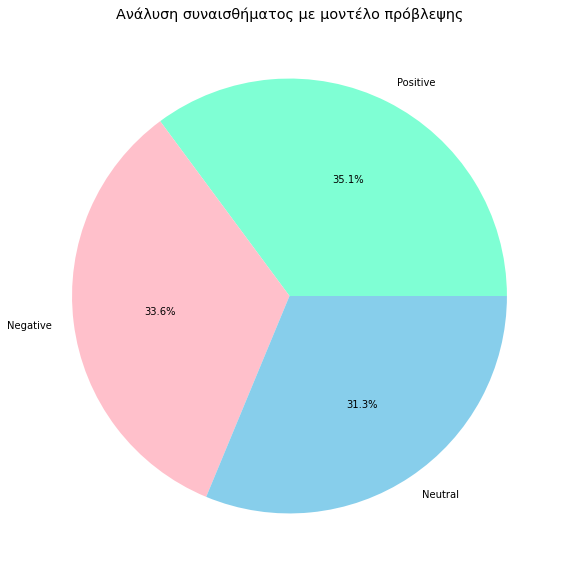

In [12]:
labels = ['Positive', 'Negative', 'Neutral']
colors = ['aquamarine', 'pink', 'skyblue']

t = df['sentiment'].value_counts(normalize=True) * 100
plt.style.use('ggplot')
plt.figure(figsize = (20, 10))
plt.pie(t, labels = labels, colors = colors, autopct = '%1.1f%%')
plt.title('Ανάλυση συναισθήματος με μοντέλο πρόβλεψης');